<h1>Supervised Learning - Bank Loan Data Classification </h1>

<h3> OVERVIEW: </h3>
Using data science in the banking industry has become a necessity to keep up with the competition. Banks collect, analyze, and store massive amounts of customer data. Machine learning and data science tools can harness this data to learn more about their clients behavior. Propensity modelling uses this large amount of data to make customer behavior predictions and retarget customers. Predictive analystics driven by such machine learning models can be used to determine which customers are more likely to avail a service such as buying a personal loan. This helps banks engage iwth customers through personalized customer interactions in relevant context.

The key to success in marketing is to make a customized offer that suits the particular client’s needs and preferences. Data scientists utilize the behavioral, demographic, and historical purchase data to build a model that predicts the probability of a customer’s response to a promotion or an offer. Therefore, banks can make an efficient, personalized outreach that suits the particular customer's needs and preferences and improve their relationships with customers.

<h3> ABOUT THE DATA: </h3>

The data in context is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget. The dataset contained in the file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. The dtaa file attributes are:

<ol> 
    <li>ID : Customer ID </li>
    <li>Age : Customer's age in completed years</li>
    <li>     Experience : #years of professional experience</li>
    <li>     Income : Annual income of the customer</li>
    <li>     ZIP Code : Home Address ZIP code.</li>
    <li>     Family : Family size of the customer</li>
    <li>     CCAvg : Avg. spending on credit cards per month</li>
    <li>     Education Level.
        <ol> 1. Undergrad 2. Graduate 3. Advanced/Professional </ol> </li>
    <li> Mortgage : Value of house mortgage if any. ($000)</li>
    <li> Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited. </li>
    <li> Personal Loan : Did this customer accept the personal loan offered in the last campaign?</li>
    <li> Securities Account : Does the customer have a securities account with the bank?</li>
    <li> CD Account : Does the customer have a certificate of deposit (CD) account with the bank?</li>     
    <li> Online : Does the customer use internet banking facilities?</li>
    <li> Credit card : Does the customer use a credit card issued by UniversalBank? </li> 
</ol>

<h3> OBJECTIVE </h3>
The classification goal is to predict the likelihood of a liability customer buying personal loans by conducting:
<ol> 
    <li> Exploratory Data Analysis </li>
    <li> Preparing the data to train a model </li>
    <li> Training and making predictions using a classification model </li>
    <li> Model evaluation </li>
</ol> 

<h3> 1. IMPORT THE NECESSARY LIBRARIES </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy.stats import zscore
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

<h3> 2. LOAD THE DATA </h3>
<li> Import the dataset and read into a dataframe </li>
<li> Standardize the column names for the dataset </li>
<li> Display the first 5 rows of the dataset to give an explarotary view of how the data looks like </li>

In [2]:
bank_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<h3> 3. DATA INFORMATION AND DATA TYPES </h3>
We will review the dataset for dimension, column description and ensure that all attributes are understood well
<li> Check dimensions of data </li>
<li> Check Information about the data and  datatypes of the  respective attributes.</li>
<li> Check for missing values in the dataset. </li>
<li> Check for negative values in the dataset. </li>

In [3]:
bank_df.shape # see the shape of the data

(5000, 14)

In [4]:
bank_df.info() # To see the data type of each of the variable, number of values entered in each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank_df.isna().apply(pd.value_counts)   #null value check

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [6]:
## A quick check for any negative values in the dataset
bank_df.lt(0).sum()

ID                    0
Age                   0
Experience           52
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
SecuritiesAccount     0
CDAccount             0
Online                0
CreditCard            0
dtype: int64

In [7]:
duplicateRowsDF = bank_df[bank_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, PersonalLoan, SecuritiesAccount, CDAccount, Online, CreditCard]
Index: []


<H4> Profile Report (Observations) </H4>
<li> There are 5000 Observations/Rows AND 14 Attributes/Columns </li>
<li> There are no missing values or null values in the dataset </li>
<li> Attribute "Experience" has 52 negative values </li>
<li> There are no duplicate rows in the dataset </li>
<li> The dataset contains: 7 Numerical variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’</li> 
<li> The dataset contains: 2 Categorical variables: ‘Education’, ‘Family’</li> 
<li> The dataset contains: 5 Boolean variables:  ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’</li> 

<h3> 4. UNIVARIATE ANALYSIS (Study of Data distribution of Each Attribute)  </h4>

We will study the data distribution of each attribute of the Numerical, Categorical and Boolean type discussed above to summarize and find thrie patterns in the dataset

<h4> Education </h4>

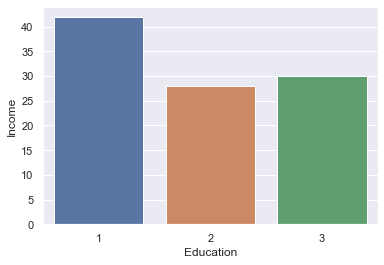

In [8]:
# The following code plots a barplot using the seaborn package to estimate the frequency of Customer's education category in the dataset.
Edu_dist=sns.barplot(x="Education", y="Income", data=bank_df, estimator=lambda x: len(x) / len(bank_df) * 100)

<h4> Family </h4>

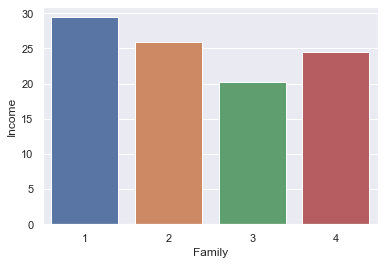

In [9]:
# The following code plots a barplot using the seaborn package to estimate the frequency of Customer's Family category in the dataset.
Family_dist=sns.barplot(x="Family", y="Income", data=bank_df, estimator=lambda x: len(x) / len(bank_df) * 100)

<h4> CD Account (Certificate of Deposit Account) </h4>

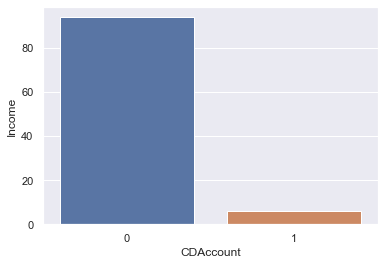

In [10]:
# The following code plots a barplot using the seaborn package to estimate the frequency of Customer's having a CD in the dataset.
CD_dist=sns.barplot(x="CDAccount", y="Income", data=bank_df, estimator=lambda x: len(x) / len(bank_df) * 100)

<h4> Credit Card </h4>

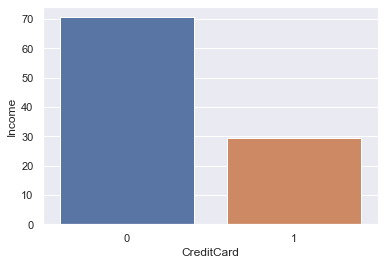

In [11]:
# The following code plots a barplot using the seaborn package to estimate the frequency of Customer's having a Credit Card in the dataset.
CC_dist=sns.barplot(x="CreditCard", y="Income", data=bank_df, estimator=lambda x: len(x) / len(bank_df) * 100)

<h4> Online (Internet Banking Facilities) </h4>

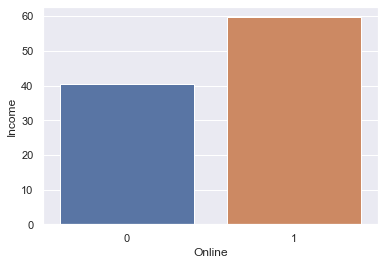

In [12]:
# The following code plots a barplot using the seaborn package to estimate the frequency of Customer's having Internet Banking in the dataset.
CC_dist=sns.barplot(x="Online", y="Income", data=bank_df, estimator=lambda x: len(x) / len(bank_df) * 100)

<h4> Personal Loan (Customer Accept the personal loan offered in last campaign) </h4>

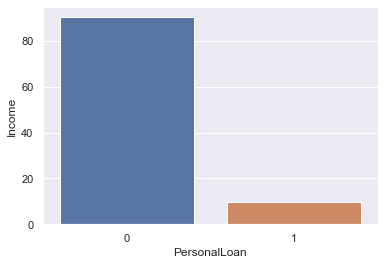

In [13]:
# The following code plots a barplot using the seaborn package to estimate the frequency of Customer's acceptoing personal loan previously in the dataset.
CC_dist=sns.barplot(x="PersonalLoan", y="Income", data=bank_df, estimator=lambda x: len(x) / len(bank_df) * 100)

<h4> Securities Account (Customer not having a Securities Account) </h4>

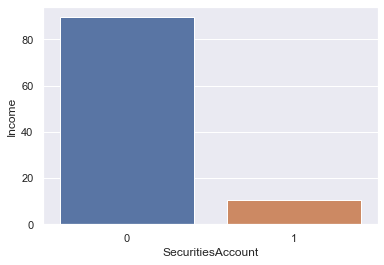

In [14]:
# The following code plots a barplot using the seaborn package to estimate the frequency of Customer having a securities account in the dataset.
CC_dist=sns.barplot(x="SecuritiesAccount", y="Income", data=bank_df, estimator=lambda x: len(x) / len(bank_df) * 100)

<h4> 5 - point Summary </h4>
We will examine the 5 point summary for the Numeric variables to  examine their univariate distribution in the dataset

In [15]:
bank_df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<h4> Skewness </h4>

In [16]:
bank_df.skew(axis = 0, skipna = True) 

ID                    0.000000
Age                  -0.029341
Experience           -0.026325
Income                0.841339
ZIPCode             -12.500221
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
PersonalLoan          2.743607
SecuritiesAccount     2.588268
CDAccount             3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

<h4> UNIVARIATE ANALYSIS OF NUMERICAL VARIABLES </h4>

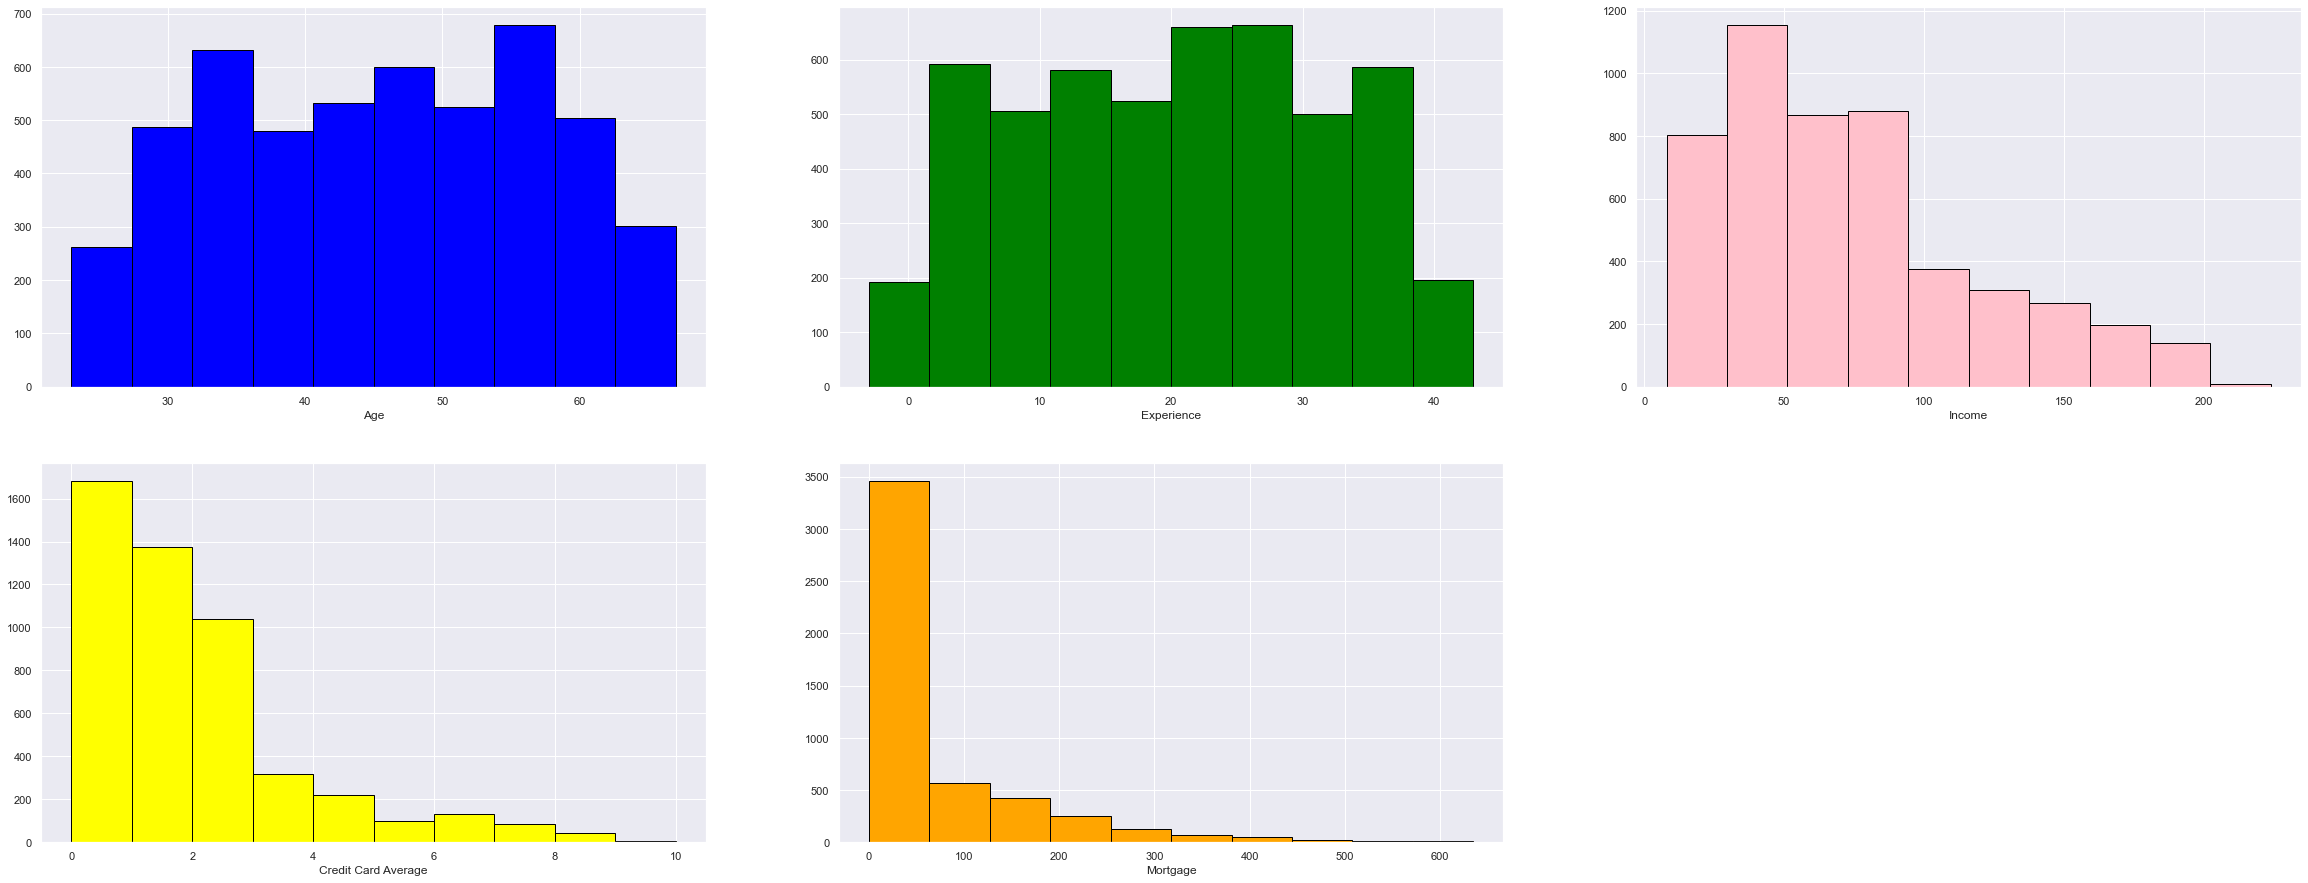

In [17]:
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(bank_df.Age, color='blue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(bank_df.Experience, color='green', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(bank_df.Income, color='pink', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(bank_df.CCAvg, color='yellow', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(bank_df.Mortgage, color='orange', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

<h4> Observation </h4>

- Age & Experience seems to be quiet normally distributed.
- Income, CCAvg and Mortgage are Positively skewed, as they are highly skewed there will be quiet a lot of extreme values

<AxesSubplot:xlabel='Mortgage'>

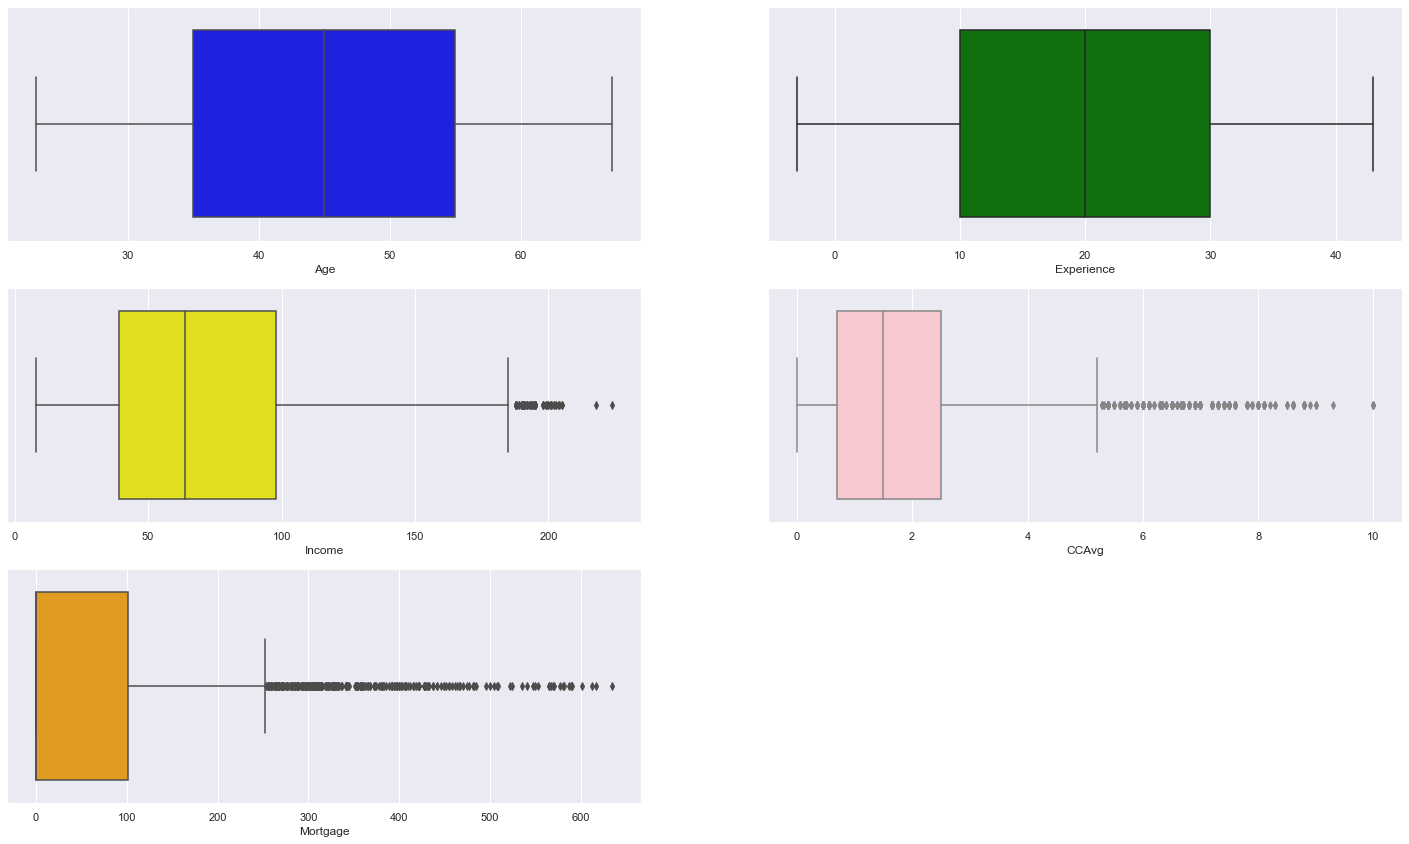

In [18]:
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= bank_df.Age, color='blue')

plt.subplot(5,2,2)
sns.boxplot(x= bank_df.Experience, color='green')

plt.subplot(5,2,3)
sns.boxplot(x= bank_df.Income, color='yellow')

plt.subplot(5,2,4)
sns.boxplot(x= bank_df.CCAvg, color='pink')

plt.subplot(5,2,5)
sns.boxplot(x= bank_df.Mortgage, color='orange')

<h4> UNIVARIATE ANALYSIS (Inference) </h4>
From the above Univariate Analysis of Categoical, Boolean and Numerical attributes in the dataset, we can conclude that:
<h5> Categorical Attributes </h5>
<li> 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate. </li>
<li> 29% of the customer’s family size is 1, 26% with family size 2, 21% with family size 3 and 24% with with family size 4  </li>

<h5> Boolean  Attributes </h5>
<li> Above 90% of the customers doen’t have a certificate of deposit (CD) account with the bank. </li>
<li> Around 71% of the customer doesn’t use a credit card issued by UniversalBank. </li>
<li> Around 60% of customers use internet banking facilities.</li> 
<li> Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.</li> 
<li> Around 90% of the customer doesn’t have a securities account with the bank.</li> 

<h5> Numerical  Attributes </h5>
<li> Age is normally distributed with majortiy between 35 and 45. The mean age of the customers is 45 with standard deviation of 11.5. </li>
<li> Mean is normally distributed with majortiy between 11 and 30. The mean experience of the customers is 20 with standard deviation of 11.5. </li>
<li> The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443) </li>
<li> The Income is positively skewed and mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.841339).</li> 
<li> The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002) and there are lots of outliers. </li> 
<li> CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K. </li>
<li> ‘ID’, ‘ZIP_Code’ & ‘Experience’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ are just numbers of series & ‘Experience’ is highly correlated with ‘Age’. </li>

<h3> 5. BIVARIATE ANALYSIS (Study of Data distribution of Each Attribute)  </h3>
Through Bivariate analysis 

Through bivariate analysis we try to analyze two variables simultaneously. As opposed to univariate analysis where we check the characteristics of a single variable, in bivariate analysis we try to determine if there is any relationship between two variables.

In our Bank Customer Loan dataset, this essentially invovles 3 scenarios that needs to be analyzed:
<ol> <li> Categorical Variable vs Target Variable: </li>
        <ol> <li> Education vs Personal Loan </li>
            <li> Family size vs Personal Loan </li>  
        </ol>
    <li> Boolean Variable vs Target Variable: </li>
        <ol> <li> Customers having CD Account vs Personal Loan </li>
            <li> Customers using credit card vs Personal Loan </li>
            <li> Customers using Internet Banking vs Personal Loan </li>
            <li> Customers having Securities Account vs Personal Loan </li>
        </ol>
    <li> Numeric Variable vs Target Variable: </li>
        <ol> <li> Age of customer vs Personal Loan </li>
            <li> Average credit card spending vs Personal Loan </li>
            <li> Annual Income vs Personal Loan </li>
            <li> Mean value of House mortgage vs Personal Loan </li>
        </ol>
</ol>

<h4> CATEGORICAL VARIABLE vs TARGET VARIABLE </h4>
We will first examine the relation between the target variable and the categorical variable using a stacked bar plot

<h5> Education vs Personal Loan </h5>
We will plot the cross tab between Education and Personal Loan. We will then normalize and compute the pecentages of loan buyers by  educational level and plot a stacked bar plot beween the two to study the relation between the two    

Cross tabulation can be given as 
 PersonalLoan     0    1
Education              
1             2003   93
2             1221  182
3             1296  205
Cross tabulation in percentage can be given as 
 PersonalLoan         0         1
Education                       
1             0.955630  0.044370
2             0.870278  0.129722
3             0.863424  0.136576


<AxesSubplot:xlabel='Education'>

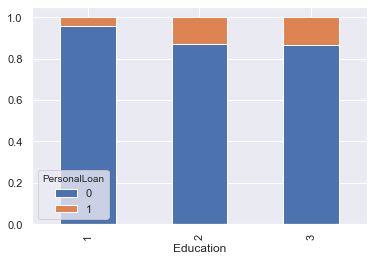

In [19]:
edu_loan = pd.crosstab(bank_df.Education,bank_df.PersonalLoan)
edu_loan_percent = pd.crosstab(bank_df.Education,bank_df.PersonalLoan, normalize='index')
print('Cross tabulation can be given as','\n',edu_loan)
print('Cross tabulation in percentage can be given as','\n',edu_loan_percent)
edu_loan_percent.plot(kind='bar',stacked='True')

***From the above cross tab and plot we can infer that persons who are more eductaed have a higher probability of buying personal loans***

<h5> Family size vs Personal Loan </h5>
We will plot the cross tab between Family size and Personal Loan. We will then normalize and compute the pecentages of loan buyers by  family size and plot a stacked bar plot beween the two to study the relation between the two 

Cross tabulation can be given as 
 PersonalLoan     0    1
Family                 
1             1365  107
2             1190  106
3              877  133
4             1088  134
Cross tabulation in percentage can be given as 
 PersonalLoan         0         1
Family                          
1             0.927310  0.072690
2             0.918210  0.081790
3             0.868317  0.131683
4             0.890344  0.109656


<AxesSubplot:xlabel='Education'>

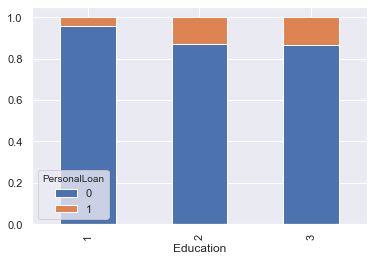

In [20]:
family_loan = pd.crosstab(bank_df.Family,bank_df.PersonalLoan)
family_loan_percent = pd.crosstab(bank_df.Family,bank_df.PersonalLoan, normalize='index')
print('Cross tabulation can be given as','\n',family_loan)
print('Cross tabulation in percentage can be given as','\n',family_loan_percent)
edu_loan_percent.plot(kind='bar',stacked='True')

***From the above cross tab and plot we can infer that number of family members do not influence the probability of buying personal loans much.***

<h4> BOOLEAN VARIABLE vs TARGET VARIABLE </h4>
We will next examine the relation between the Boolean variables (‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Securities Account’) vs Target variable (‘Personal_Loan’) using the crosstab function and stacked bar plot to compare. 

Cross tabulation can be given as 
 PersonalLoan     0    1
CDAccount              
0             4358  340
1              162  140
Cross tabulation in percentage can be given as 
 PersonalLoan         0         1
CDAccount                       
0             0.927629  0.072371
1             0.536424  0.463576


<AxesSubplot:xlabel='CDAccount'>

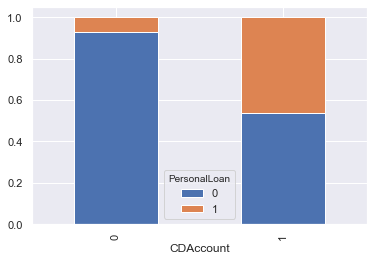

In [21]:
CD_loan = pd.crosstab(bank_df.CDAccount,bank_df.PersonalLoan)
CD_loan_percent = pd.crosstab(bank_df.CDAccount,bank_df.PersonalLoan, normalize='index')
print('Cross tabulation can be given as','\n',CD_loan)
print('Cross tabulation in percentage can be given as','\n',CD_loan_percent)
CD_loan_percent.plot(kind='bar',stacked='True')

Cross tabulation can be given as 
 PersonalLoan     0    1
CreditCard             
0             3193  337
1             1327  143
Cross tabulation in percentage can be given as 
 PersonalLoan         0         1
CreditCard                      
0             0.904533  0.095467
1             0.902721  0.097279


<AxesSubplot:xlabel='CreditCard'>

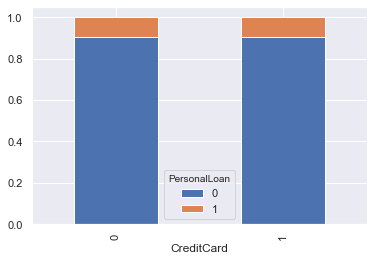

In [22]:
CreditCard_loan = pd.crosstab(bank_df.CreditCard,bank_df.PersonalLoan)
CreditCard_loan_percent = pd.crosstab(bank_df.CreditCard,bank_df.PersonalLoan, normalize='index')
print('Cross tabulation can be given as','\n',CreditCard_loan)
print('Cross tabulation in percentage can be given as','\n',CreditCard_loan_percent)
CreditCard_loan_percent.plot(kind='bar',stacked='True')

Cross tabulation can be given as 
 PersonalLoan     0    1
Online                 
0             1827  189
1             2693  291
Cross tabulation in percentage can be given as 
 PersonalLoan        0        1
Online                        
0             0.90625  0.09375
1             0.90248  0.09752


<AxesSubplot:xlabel='Online'>

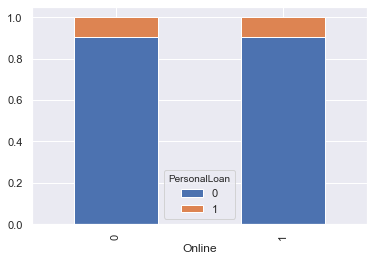

In [23]:
Online_loan = pd.crosstab(bank_df.Online,bank_df.PersonalLoan)
Online_loan_percent = pd.crosstab(bank_df.Online,bank_df.PersonalLoan, normalize='index')
print('Cross tabulation can be given as','\n',Online_loan)
print('Cross tabulation in percentage can be given as','\n',Online_loan_percent)
Online_loan_percent.plot(kind='bar',stacked='True')

Cross tabulation can be given as 
 PersonalLoan          0    1
SecuritiesAccount           
0                  4058  420
1                   462   60
Cross tabulation in percentage can be given as 
 PersonalLoan              0         1
SecuritiesAccount                    
0                  0.906208  0.093792
1                  0.885057  0.114943


<AxesSubplot:xlabel='Online'>

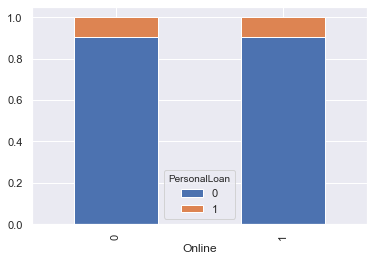

In [24]:
Securities_loan = pd.crosstab(bank_df.SecuritiesAccount,bank_df.PersonalLoan)
Securities_loan_percent = pd.crosstab(bank_df.SecuritiesAccount,bank_df.PersonalLoan, normalize='index')
print('Cross tabulation can be given as','\n',Securities_loan)
print('Cross tabulation in percentage can be given as','\n',Securities_loan_percent)
Online_loan_percent.plot(kind='bar',stacked='True')

**From the above cross tab and stacked bar plots for Boolean Variable vs Target Variable we can infer that** 
<li> Customers who have a certificate of deposit (CD) account with the bank seem to have affect probability of buying a personal loan from the bank in the past.</li>
<li> Customers who use or do not use a credit card issued by UniversalBank do not seem to affect the probability of buying a personal loan.</li>
<li> Customers who use or do not use use internet banking facilities seems to not affect the probability of buying personal loan.</li>
<li> Customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan. </li> 

<h4> NUMERIC INDEPENDENT VARIABLE vs TARGET VARIABLE </h4>
We will next examine the relation between the Numeric Independent Variable (‘Age’, ‘CC_Avg’ ‘Income’, ‘Mortgage’, ‘Experience’) vs Target variable (‘Personal_Loan’). For this purpose, we will compute and compare the mean of the Independent variable for which the customer buys the loan vs mean of the Independent variable for which the customer does not buy the loan using the dataframe.groupby() function.

In [25]:
print(bank_df.groupby('PersonalLoan')['Age'].mean())
#bank_df.groupby('PersonalLoan')['Age']

PersonalLoan
0    45.367257
1    45.066667
Name: Age, dtype: float64


<AxesSubplot:xlabel='PersonalLoan'>

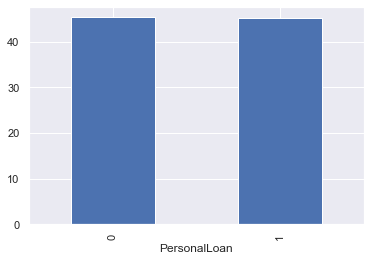

In [26]:
bank_df.groupby('PersonalLoan')['Age'].mean().plot(kind='bar')

In [27]:
print(bank_df.groupby('PersonalLoan')['CCAvg'].mean())

PersonalLoan
0    1.729009
1    3.905354
Name: CCAvg, dtype: float64


<AxesSubplot:xlabel='PersonalLoan'>

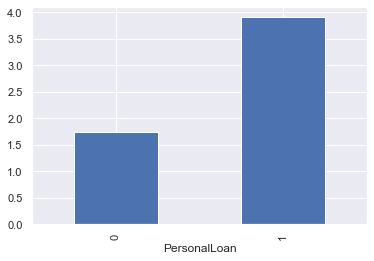

In [28]:
bank_df.groupby('PersonalLoan')['CCAvg'].mean().plot(kind='bar')

In [29]:
print(bank_df.groupby('PersonalLoan')['Income'].mean())

PersonalLoan
0     66.237389
1    144.745833
Name: Income, dtype: float64


<AxesSubplot:xlabel='PersonalLoan'>

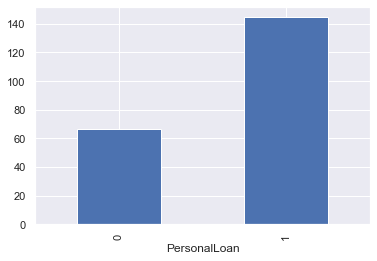

In [30]:
bank_df.groupby('PersonalLoan')['Income'].mean().plot(kind='bar')

In [55]:
#print(bank_df.groupby('PersonalLoan')['Mortgage'].mean())
df1 = bank_df.groupby('PersonalLoan')['Mortgage'].mean()
print (df1)

PersonalLoan
0    46.787539
1    60.695150
Name: Mortgage, dtype: float64


<AxesSubplot:xlabel='PersonalLoan'>

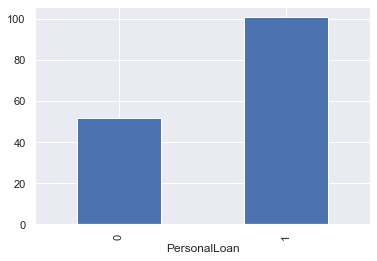

In [32]:
bank_df.groupby('PersonalLoan')['Mortgage'].mean().plot(kind='bar')

**From the above groupby() and bar plots for Numerical Independent Variable vs Target Variable we can infer that** 
<li> Customers Age does not seem to affect probability of buying a personal loan from the bank.</li>
<li> Customers who have a higher average spending on the credit cards seem more probable of buying a personal loan.</li>
<li> Customers who have a higher Annual Income seem more probable of buying personal loan.</li>
<li> Customers who have a higher mortgage are more probable of buying a personal loan. </li> 

<h4> Checking for Correlation </h4>

<AxesSubplot:>

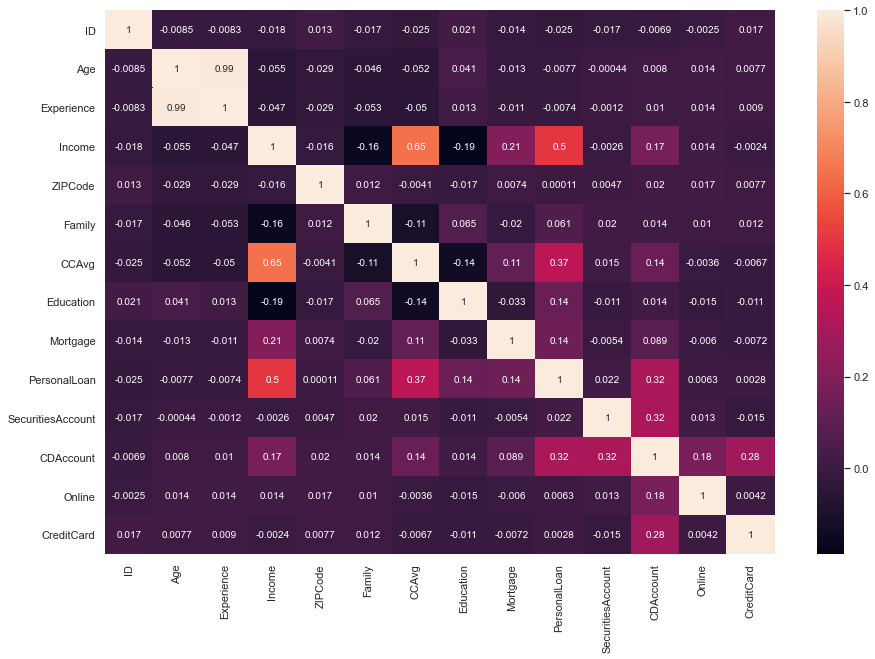

In [33]:
# Correlation with heat map
plt.figure(figsize = (15,10))
sns.heatmap(bank_df.corr(), annot = True )

<h4> Observation </h4>
<li> Age and  Experience are highly corelated </li>
<li> Income and CCAvg are also corelated moderately </li>

<h3> 6. PREPROCESSING (Treat Missing Values, Negative Values and Outliers)  </h3>
As observed in the Profile Report initially:
<li> Dataset does not contain any missing values. </li> 
<li> Dataset contains 52 negative values for 'Experience; </li>
<li> Dataset contains outliers for 'Mortgage' </li>

All the above required to be treated before we move to model building

<h4> Negative Value  Treatement for 'Experience' </h4>

In [34]:
dfposExp = bank_df.loc[bank_df['Experience'] >0]
mask = bank_df.Experience < 0
column_name = 'Experience'
mylist = bank_df.loc[mask]['ID'].tolist()

In [35]:
for id in mylist:
    age = bank_df.loc[np.where(bank_df['ID']==id)]["Age"].tolist()[0]
    education = bank_df.loc[np.where(bank_df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfposExp[(dfposExp.Age == age) & (dfposExp.Education == education)]
    exp = df_filtered['Experience'].median()
    bank_df.loc[bank_df.loc[np.where(bank_df['ID']==id)].index, 'Experience'] = exp

In [36]:
bank_df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [37]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         4971 non-null   float64
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [38]:
## A quick check for any negative values in the dataset
bank_df.lt(0).sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

<h4> Outlier Treatment for 'Mortgage' </h4>
Skewness and Outliers are removed using z-score. We can start by importing z-score from the stats library of scipy. We will identify those rows only whose z_score is less than 3. This will almost amount to 100+ rows which contain outliers which  needs to be dropped before we can start with the model building.

In [39]:
from scipy import stats
bank_df['Mortgage_zscore'] = np.abs(stats.zscore(bank_df['Mortgage']))
bank_df=bank_df[bank_df['Mortgage_zscore']<3]
bank_df.drop('Mortgage_zscore',axis=1,inplace=True)

In [40]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4895 non-null   int64  
 1   Age                4895 non-null   int64  
 2   Experience         4866 non-null   float64
 3   Income             4895 non-null   int64  
 4   ZIPCode            4895 non-null   int64  
 5   Family             4895 non-null   int64  
 6   CCAvg              4895 non-null   float64
 7   Education          4895 non-null   int64  
 8   Mortgage           4895 non-null   int64  
 9   PersonalLoan       4895 non-null   int64  
 10  SecuritiesAccount  4895 non-null   int64  
 11  CDAccount          4895 non-null   int64  
 12  Online             4895 non-null   int64  
 13  CreditCard         4895 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 573.6 KB


<h3> 6. SPLIT THE DATA INTO TRAINING AND TEST SET IN 70:30 RATIO </h3>

In [41]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bank_df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

In [42]:
train_set_indep = bank_df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = bank_df["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3450, :]
X_Test = X[3451: , :]
Y_Train = Y[:3450, ]
Y_Test = Y[3451:, ]

<h3> 7. Model Building - Logistic Regression </h3>

In [43]:
from sklearn.linear_model import LogisticRegression
LogReg_model = LogisticRegression()
LogReg_model.fit(X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = LogReg_model.predict(X_Test)
y_predictProb = LogReg_model.predict_proba(X_Test)
print(classification_report(Y_Test,y_pred))
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1335
           1       0.68      0.50      0.58       109

    accuracy                           0.94      1444
   macro avg       0.82      0.74      0.77      1444
weighted avg       0.94      0.94      0.94      1444

0.9445983379501385
[[1309   26]
 [  54   55]]


<h3> Model Evaluation - Logarithmic Regression </h3>

From the above classification report, accuracy score and confusion matrix we can deduce the following:
<li> Accuracy was 94.45% </li>
<li> False Negative is 54. Lower False negative is desired since it indicates the customers who had actually bought the personal loan but our model predicted then to be a non-buyer </li>
<li> Recall for '1' is 50% which indicates that out of the total number of customers who actually bought personal loans, our model is able to pick only 50% of the customers to be correctly predicted.  </li>

<h3> 8. STANDARDIZATION OF DATASET   </h3>
When we build the model, we are left to work with different features which are in difference scales of measures. When building the the models, the estimated weights of these features will update at different rates. This will give some variation in results. Standarding the data features to the same scale will allow the models to run better with accurate results.
Dataset is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula: z=x-μ/𝛔

In [45]:
from sklearn import preprocessing 

scaler=preprocessing.StandardScaler()                 # Create the scaler object
scaled_X_Train=scaler.fit_transform(X_Train)          # Fit data into the scaler object
scaled_X_Test=scaler.fit_transform(X_Test)

In [46]:
LogReg_model = LogisticRegression()
LogReg_model.fit(scaled_X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred = LogReg_model.predict(scaled_X_Test)
y_predictProb = LogReg_model.predict_proba(X_Test)
print(classification_report(Y_Test,y_pred))
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1335
           1       0.72      0.62      0.67       109

    accuracy                           0.95      1444
   macro avg       0.85      0.80      0.82      1444
weighted avg       0.95      0.95      0.95      1444

0.953601108033241
[[1309   26]
 [  41   68]]


After the standardization and rerunning the model, the classification report, accuracy score and confusion matrix can be interpreted as follows:
<li> Accuracy slightly increased to 95.36% </li>
<li> False Negative is 41. Lower It indicates that customers who had actually bought the personal loan but that which our model predicted them to be a non-buyer was lesser </li>
<li> Recall for '1' is 62%, a slight increase which indicates that out of the total number of customers who actually bought personal loans, our model is able to pick only 62% of the customers to be correctly predicted.  </li>

<h3> 9. Model Building - kNN </h3>

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model = KNeighborsClassifier(n_neighbors=3)
kNN_model.fit(X_Train,Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [49]:
y_pred = kNN_model.predict(X_Test)
y_predictProb = kNN_model.predict_proba(X_Test)
print(classification_report(Y_Test,y_pred))
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1335
           1       0.40      0.27      0.32       109

    accuracy                           0.91      1444
   macro avg       0.67      0.62      0.64      1444
weighted avg       0.90      0.91      0.91      1444

0.9148199445983379
[[1292   43]
 [  80   29]]


<h3> Model Evaluation - kNN </h3>

From the above classification report, accuracy score and confusion matrix we can deduce the following:
<li> Accuracy is 91.5% </li>
<li> False Negative is 80.  It indicates that customers who had actually bought the personal loan but that which our model predicted them to be a non-buyer. It is higher and not a strong measure for a good model </li>
<li> Recall for '1' is 27%, which is also a poor measure.  </li>

<h3> 10. Model Building - Naive Bayes </h3>

In [50]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_Train,Y_Train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
y_pred = naive_model.predict(X_Test)
y_predictProb = naive_model.predict_proba(X_Test)
print(classification_report(Y_Test,y_pred))
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1335
           1       0.34      0.49      0.40       109

    accuracy                           0.89      1444
   macro avg       0.65      0.70      0.67      1444
weighted avg       0.91      0.89      0.90      1444

0.889196675900277
[[1231  104]
 [  56   53]]


<h3>11. Model Evaluation - Naive Bayes </h3>

From the above classification report, accuracy score and confusion matrix we can deduce the following for Naive Bayes model:
<li> Accuracy is 89% </li>
<li> False Negative is 56.  It indicates that customers who had actually bought the personal loan but that which our model predicted them to be a non-buyer. It is somewhat high and not a strong measure for a good model </li>
<li> Recall for '1' is 49%, which is also a poor measure.  </li>

<h3>12. Model Comparison </h3>

LR: 0.923386 (0.016188)
KNN: 0.908275 (0.008909)
NB: 0.895200 (0.010838)


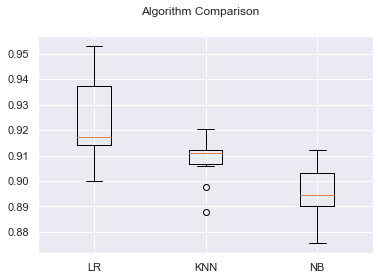

In [52]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h3>CONCLUSION </h3>

For the Banking Customer Data prediction, we have evalued the LR, kNN and Naive Bayes Model Algorithms. From the above model comparison and graph, it is evident that LR Algorithm has a Higher Accuracy, Low False Negative and High Recall for '1'. Hence to support the project objective i.e to help convert Thera Bank's liability customers into loan customers, predictive information can best be provide by the LR model with greater accuracy. 